In [3]:
import pandas as pd

In [5]:
from google.colab import files
import io
uploaded = files.upload()
data_file = pd.read_csv(io.BytesIO(uploaded["Mall_Customers.csv"]))
data_file.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data = data_file.copy()

In [7]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer

# Imputers for categorical and continuous data
cat_imputer = SimpleImputer(strategy="most_frequent")
cont_imputer = SimpleImputer(strategy="median")

# Imputing categorical columns (Gender_Code, Region)
data['Gender'] = cat_imputer.fit_transform(data[['Gender']])
data['Age'] = cat_imputer.fit_transform(data[['Age']])

# Imputing continuous columns (Income, Spending)
data['Annual Income (k$)'] = cont_imputer.fit_transform(data[['Annual Income (k$)']])
data['Spending Score (1-100)'] = cont_imputer.fit_transform(data[['Spending Score (1-100)']])

# Check if there are any missing values left
remaining_missing_values = data.isnull().sum()

# Display the updated dataset and check for remaining missing values
data.head(), remaining_missing_values

(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                15.0                    39.0
 1           2    Male   21                15.0                    81.0
 2           3  Female   20                16.0                     6.0
 3           4  Female   23                16.0                    77.0
 4           5  Female   31                17.0                    40.0,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64)

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(data[['Gender', 'Age']])

# Create a DataFrame from the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['Gender', 'Age']))

# Standardizing continuous variables
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Create a DataFrame from the standardized continuous variables
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Combine the encoded and scaled data
preprocessed_data = pd.concat([data['CustomerID'], encoded_categorical_df, scaled_continuous_df], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CustomerID,Gender_Female,Gender_Male,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Annual Income (k$),Spending Score (1-100)
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,-0.434801
1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,1.195704
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,-1.715913
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,1.040418
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.662660,-0.395980


In [14]:
# prompt: Convert the column name from Annual Income (k$) to Income

preprocessed_data.rename(columns={'Income': 'Annual_Income'}, inplace=True)
preprocessed_data.head()


preprocessed_data.rename(columns={'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
preprocessed_data.head()

,CustomerID,Gender_Female,Gender_Male,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Annual_Income,Spending_Score
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,-0.434801
1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,1.195704
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,-1.715913
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,1.040418
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.662660,-0.395980


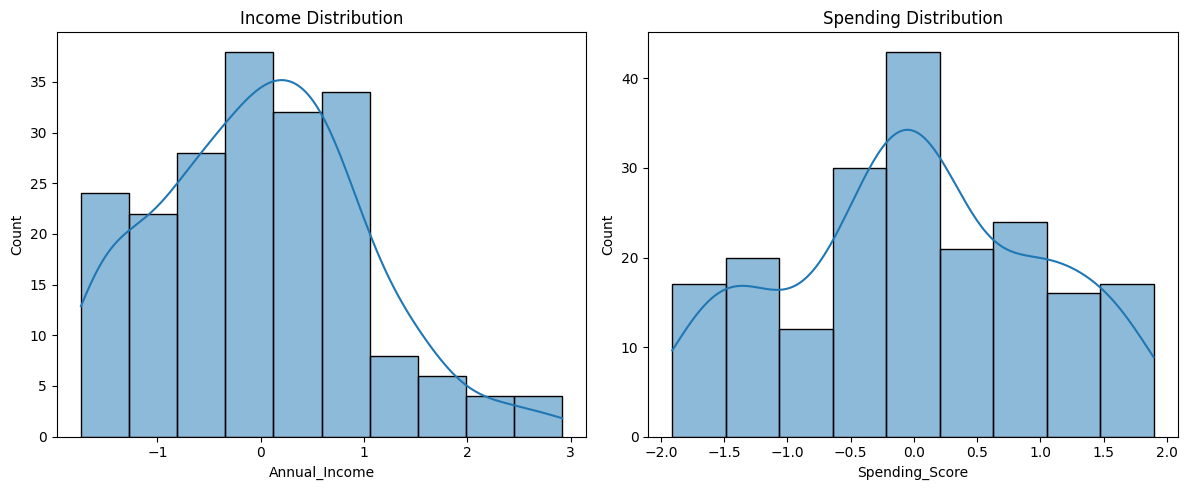

,Annual_Income,Spending_Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for the continuous variables
descriptive_stats = preprocessed_data[['Annual_Income', 'Spending_Score']].describe()

# Plotting distributions and relationships
plt.figure(figsize=(12, 5))

# Distribution of Income
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_data['Annual_Income'], kde=True)
plt.title('Income Distribution')

# Distribution of Spending
plt.subplot(1, 2, 2)
sns.histplot(preprocessed_data['Spending_Score'], kde=True)
plt.title('Spending Distribution')

plt.tight_layout()
plt.show()

descriptive_stats

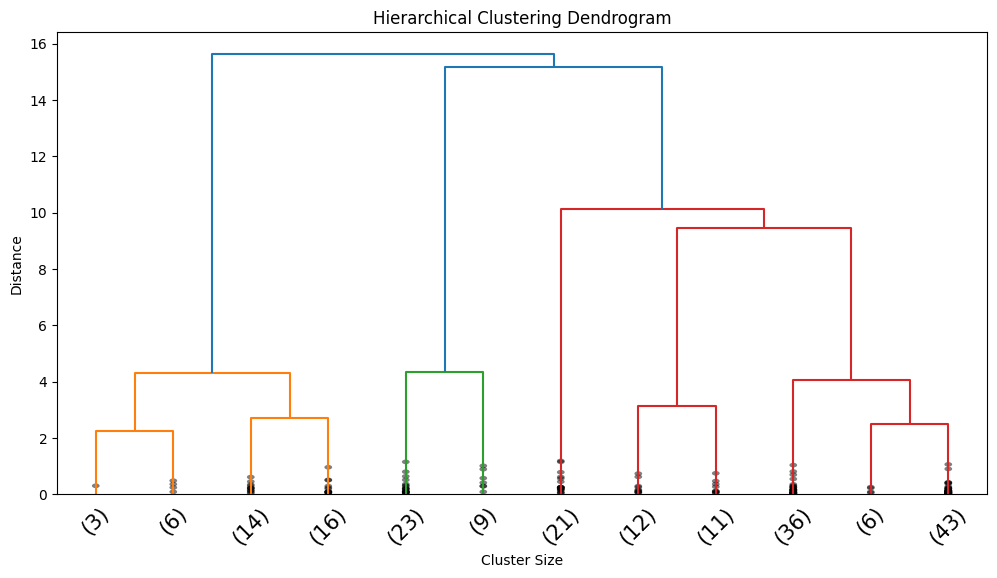

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(preprocessed_data[['Annual_Income', 'Spending_Score']], method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

# Choosing the number of clusters based on the dendrogram
# We decide to cut the dendrogram at a distance that forms a reasonable number of clusters
# Here, we choose a distance threshold to form clusters
distance_threshold = 6
clusters = fcluster(Z, distance_threshold, criterion='distance')

# Adding the cluster labels to our preprocessed data
clustered_data = preprocessed_data.copy()
clustered_data['Cluster'] = clusters

# Display the first few rows with cluster labels
clustered_data.head()

,CustomerID,Gender_Female,Gender_Male,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Annual_Income,Spending_Score,Cluster
0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,-0.434801,4
1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.738999,1.195704,3
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,-1.715913,4
3,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.700830,1.040418,3
4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.662660,-0.395980,4


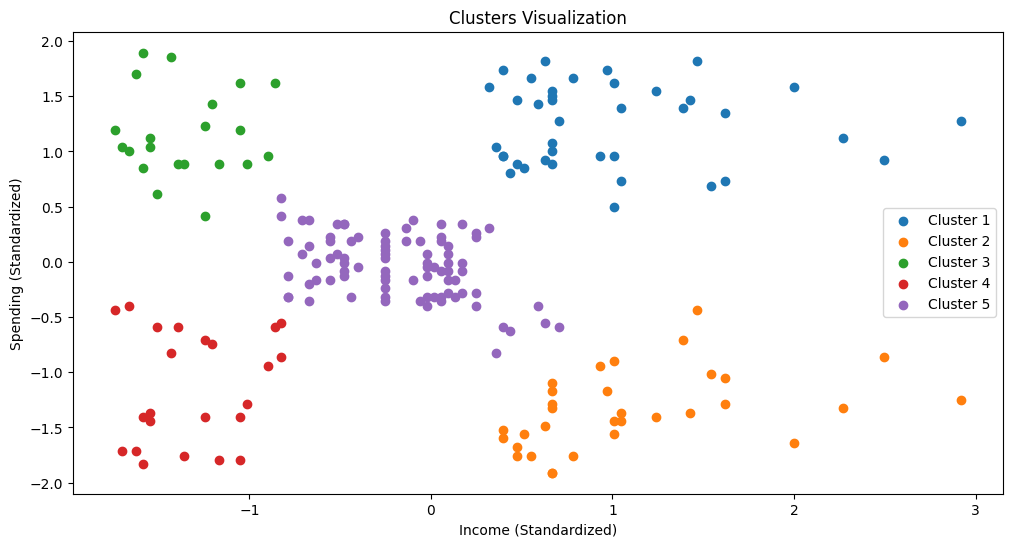

,CustomerID,Gender_Female,Gender_Male,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70,Annual_Income,Spending_Score
Cluster,,,,,,,,,,,,,,,,,,,,,
1,162.000000,0.538462,0.461538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.991583,1.239503
2,166.250000,0.437500,0.562500,0.000000,0.062500,0.031250,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.101045,-1.343469
3,22.000000,0.571429,0.428571,0.047619,0.000000,0.095238,0.142857,0.095238,0.142857,0.095238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.353670,1.158731
4,23.000000,0.608696,0.391304,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.043478,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,-1.307519,-1.136965
5,87.894118,0.600000,0.400000,0.035294,0.058824,0.011765,0.023529,0.011765,0.035294,0.023529,...,0.023529,0.000000,0.011765,0.023529,0.035294,0.035294,0.011765,0.023529,-0.181237,-0.041562


In [19]:
# Statistical Summary of each cluster
cluster_summary = clustered_data.groupby('Cluster').mean()

# Plotting the clusters
plt.figure(figsize=(12, 6))

# Plot for Income vs. Spending for each cluster
for cluster in cluster_summary.index:
    plt.scatter(clustered_data[clustered_data['Cluster'] == cluster]['Annual_Income'],
                clustered_data[clustered_data['Cluster'] == cluster]['Spending_Score'],
                label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('Income (Standardized)')
plt.ylabel('Spending (Standardized)')
plt.legend()
plt.show()

cluster_summary